# Setup

In [3]:
url = 'http://ee64-34-125-38-181.ngrok.io'
# url = 'http://35.232.59.3:8080'

In [2]:
from tqdm import tqdm
import matplotlib.pyplot as plt
from zipfile import ZipFile
%matplotlib inline

# Evaluation Functions

In [4]:
def recall_at_k(true_list,predicted_list,k=40):   
      
    return round(len([i for i in predicted_list[:k] if i in true_list]) / len(true_list), 3)

In [5]:
def precision_at_k(true_list,predicted_list,k=40):     

    return round(len([i for i in predicted_list[:k] if i in true_list]) / k, 3)

In [6]:
def r_precision(true_list,predicted_list):

    return round(len([i for i in predicted_list[:len(true_list)] if i in true_list]) / len(true_list), 3)

In [7]:
def reciprocal_rank_at_k(true_list,predicted_list,k=40):

    ele = next((i for i, v in enumerate(predicted_list) if v in true_list), None)
    if ele == None or ele > (k - 1):
      return 0.000
    else:
      return round(1 / (ele + 1), 3)

In [8]:
def f_score(true_list,predicted_list,k=40):
    
    precision = precision_at_k(true_list,predicted_list,k)
    recall = recall_at_k(true_list,predicted_list,k)
    if precision == 0 and recall == 0:
      return 0
    else:
      return round((2 * precision * recall) / (precision + recall), 3)

In [9]:
def average_precision(true_list, predicted_list, k=40):
    true_set = frozenset(true_list)
    predicted_list = predicted_list[:k]
    precisions = []
    for i,doc_id in enumerate(predicted_list):        
        if doc_id in true_set:
            prec = (len(precisions)+1) / (i+1)            
            precisions.append(prec)
    if len(precisions) == 0:
        return 0.0
    return round(sum(precisions)/len(precisions),3)

In [10]:
def evaluate(true_relevancy,predicted_relevancy,k,print_scores=True):   

    recall_lst = []
    precision_lst = []
    f_score_lst = []
    r_precision_lst = []
    reciprocal_rank_lst = []
    avg_precision_lst = []
    metrices = {'recall@k':recall_lst,
                'precision@k':precision_lst,
                'f_score@k': f_score_lst,
                'r-precision': r_precision_lst,
                'MRR@k':reciprocal_rank_lst,
                'MAP@k':avg_precision_lst}

    for query, ground_true in true_relevancy:  
      predicted = predicted_relevancy[query]

      recall_lst.append(recall_at_k(ground_true,predicted,k=k))
      precision_lst.append(precision_at_k(ground_true,predicted,k=k))
      f_score_lst.append(f_score(ground_true,predicted,k=k))
      r_precision_lst.append(r_precision(ground_true,predicted))
      reciprocal_rank_lst.append(reciprocal_rank_at_k(ground_true,predicted,k=k))
      avg_precision_lst.append(average_precision(ground_true,predicted,k=k))

    if print_scores:
        for name,values in metrices.items():
                print(name,sum(values)/len(values))

    return metrices

In [131]:
def plot_metric_different_quieries(true_relevancy,predicted_relevancy,metrices_names,k):

    for metric_name in metrices_names:
      met = evaluate(true_relevancy,predicted_relevancy,k=k,print_scores=False)
      met_list = met[metric_name]
      plt.xlabel("Queries")
      plt.ylabel("Metric")
      plt.title(metric_name)
      plt.bar([i+1 for i in range(len(met_list))], met_list)
      plt.show()

# Test PageRank and PageViews

In [44]:
import requests
from time import time

try:
  res = requests.post(url + '/get_pageview', json=[1, 3434750, 713, 1], timeout=35)
  if res.status_code == 200:
    pred_wids = res.json()
    print(pred_wids)
except:
  pass

try:
  res = requests.post(url + '/get_pagerank', json=[1, 3434750, 713, 1], timeout=35)
  if res.status_code == 200:
    pred_wids = res.json()
    print(pred_wids)
except:
  pass

[1559062, 14347]
[9913.72878216078, 13.387949399744079]


# Test all queries with MAP

In [126]:
import json

with open('queries_train.json', 'rt') as f:
  queries = json.load(f)

In [127]:
import pickle

with open("dt/dt.pkl", 'rb') as f:
    dt = pickle.load(f)

In [128]:
a = {k:[(id,dt.get(id, 'None')) for id in v] for k, v in queries.items()}

In [133]:
print(a['how to earn money online'])
#print(len([t for id, t in a['data science'] if (('data' in t or 'Data' in t) and ('Science' in t or 'science' in t))]))

[(17362858, 'Make Money Fast'), (8957449, 'Work-at-home scheme'), (13612149, 'Paid to click'), (51895777, 'Make Money'), (60898024, 'Advertising revenue'), (50683920, 'Business of webcomics'), (42471422, 'Micro job'), (8983183, 'Money'), (63295665, 'Prodege'), (484030, 'Freelancer'), (3206057, 'Black money scam'), (1847385, 'Pay to surf'), (52412294, 'Media Revenue Generation'), (31452088, 'Fiverr'), (1012806, 'Click fraud'), (59440349, 'Steady (app)'), (195809, 'PayPal'), (703758, 'Affiliate marketing'), (15037, 'Income'), (1279101, 'Entropia Universe'), (2095532, 'Passive income'), (17418777, 'List of confidence tricks'), (805626, 'Internet fraud'), (6050003, 'Beenz.com'), (19390, 'Money laundering'), (19776474, 'Internet celebrity'), (11921, 'Gambling'), (4193788, 'Making Money'), (14754518, 'Website monetization'), (21179478, 'Social media marketing'), (2732267, 'Gold farming'), (2941963, 'Remittance'), (39217006, 'HitBliss'), (2905253, 'Cashback'), (1946204, 'Music industry'), (32

In [136]:
token = 'how to earn money online'
o = [(id, dt[id]) for id in pred_wids[token] if id not in [id for id, t in a[token]]] # חזרו ולא רלוונטים
b = [(id, t) for id, t in a[token] if id in pred_wids[token]] # רלוונטים שחזרו
c = [(id, t) for id, t in a[token] if id not in pred_wids[token]] # רלוונטים שלא חזרו
selected = c
print(len(selected))
print(selected)

90
[(17362858, 'Make Money Fast'), (8957449, 'Work-at-home scheme'), (13612149, 'Paid to click'), (51895777, 'Make Money'), (60898024, 'Advertising revenue'), (50683920, 'Business of webcomics'), (42471422, 'Micro job'), (63295665, 'Prodege'), (484030, 'Freelancer'), (3206057, 'Black money scam'), (1847385, 'Pay to surf'), (52412294, 'Media Revenue Generation'), (31452088, 'Fiverr'), (1012806, 'Click fraud'), (59440349, 'Steady (app)'), (195809, 'PayPal'), (703758, 'Affiliate marketing'), (15037, 'Income'), (1279101, 'Entropia Universe'), (2095532, 'Passive income'), (17418777, 'List of confidence tricks'), (805626, 'Internet fraud'), (6050003, 'Beenz.com'), (19776474, 'Internet celebrity'), (11921, 'Gambling'), (4193788, 'Making Money'), (14754518, 'Website monetization'), (21179478, 'Social media marketing'), (2732267, 'Gold farming'), (2941963, 'Remittance'), (39217006, 'HitBliss'), (2905253, 'Cashback'), (1946204, 'Music industry'), (3287760, 'Gold sink'), (59872594, 'OnlyFans'), (

In [179]:
import requests
from time import time
url = 'http://feda-35-196-170-248.ngrok.io'
qs_res = []
pred_wids = {}
sum_duration = 0
map25 = True
duration35 = True
for q, true_wids in queries.items():
  duration, ap = None, None
  t_start = time()
  try:
    res = requests.get(url + '/search', {'query': q}, timeout=35)
    duration = time() - t_start
    sum_duration += duration
    if res.status_code == 200:
      pred_wids[q] = [tup[0] for tup in res.json()]
      ap = average_precision(true_wids, pred_wids[q])
      if ap < 0.25: map25 = False 
  except:
    pass
  
  if duration == None: duration35 = False
  qs_res.append((q, duration, ap))

In [180]:
print("Duration < 35s : " + str(duration35))
print("AP@40 > 0.25   : " + str(map25))
print("AVG Duration   : " + str(sum_duration/len(queries)) + "\n")
qs_res

Duration < 35s : True
AP@40 > 0.25   : False
AVG Duration   : 1.1905161619186402



[('python', 0.16689682006835938, 0.753),
 ('data science', 1.2766375541687012, 0.769),
 ('migraine', 0.08427906036376953, 0.983),
 ('chocolate', 0.24769377708435059, 0.731),
 ('how to make pasta', 1.7641079425811768, 0.554),
 ('Does pasta have preservatives?', 1.786224603652954, 0.324),
 ('how google works', 2.9306890964508057, 0.792),
 ('what is information retrieval', 1.0375006198883057, 0.929),
 ('NBA', 0.3210465908050537, 0.538),
 ('yoga', 0.15656328201293945, 0.69),
 ('how to not kill plants', 1.2160725593566895, 0.303),
 ('masks', 0.49052858352661133, 0.647),
 ('black friday', 1.0931520462036133, 0.937),
 ('why do men have nipples', 3.7870538234710693, 0.774),
 ('rubber duck', 0.2197284698486328, 0.872),
 ('michelin', 0.11311054229736328, 0.69),
 ('what to watch', 1.446965217590332, 0.567),
 ('best marvel movie', 1.961000680923462, 0.332),
 ('how tall is the eiffel tower', 0.625298261642456, 0.85),
 ('where does vanilla flavoring come from', 1.1374437808990479, 0.858),
 ('best ic

recall@k 0.2307
precision@k 0.4541666666666667
f_score@k 0.30423333333333324
r-precision 0.31923333333333337
MRR@k 0.8790999999999999
MAP@k 0.6852333333333334


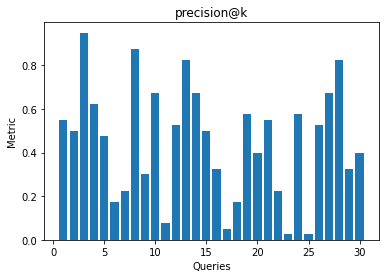

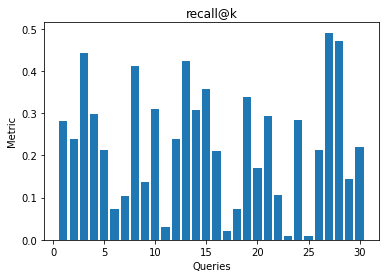

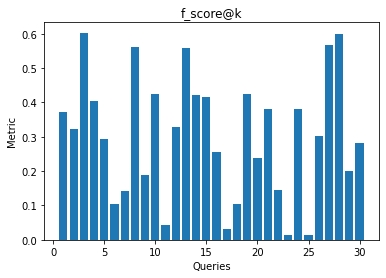

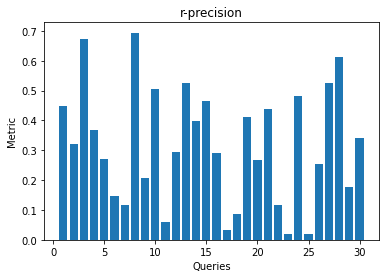

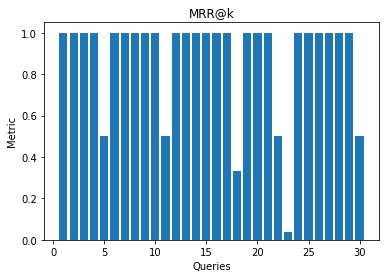

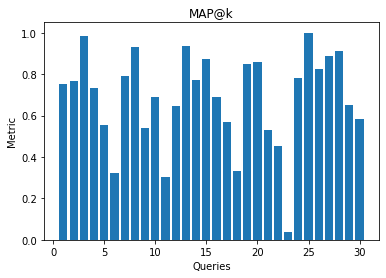

In [181]:
evaluate(queries.items(),pred_wids,k=40,print_scores=True)
plot_metric_different_quieries(queries.items(),pred_wids,['precision@k','recall@k','f_score@k','r-precision','MRR@k','MAP@k'],k=40)